<a href="https://colab.research.google.com/github/ShraddhaP123/DigiCard-by-ABC-Payments/blob/main/DigiCard_by_ABC_Payments_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Uploading the dataset from Local machine**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving simpl_payments_bank_digicard_v1.0.csv to simpl_payments_bank_digicard_v1.0 (3).csv


**Reading the CSV file**

In [10]:
data=pd.read_csv("simpl_payments_bank_digicard_v1.0.csv")

**Reorder the columns in order to get "approved" column at last**

In [11]:
cols = [col for col in data if col != 'approved'] + ['approved']  
data = data[cols]

**Checking the First 5 rows of the dataset**

In [12]:
data.head()

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,approved
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,"45424 Norris Common Apt. 390\r\nNorth Mike, AR...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R,0
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,"5022 Rebecca Haven Apt. 258\r\nThompsonfurt, C...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R,0
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,"8780 Brown Loaf Apt. 099\r\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R,0
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,721 Jackson Extensions Suite 995\r\nNew Tarasi...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R,0
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,"935 Burch Divide\r\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I,0


**Checking the rows and columns of the dataset**

In [13]:
data.shape

(45222, 21)

**Understanding the statistical information regarding the dataset**

In [14]:
data.describe()

,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,approved
count,45222.000000,45222.000000,45222.000000,45222.000000,43931.000000,45222.000000,45140.000000,45222.000000
mean,10.118460,1101.430344,88.595418,40.938017,28.936560,79.807019,1.063735,0.247844
std,2.552881,7506.430084,404.956092,12.007508,35.393095,143.951963,0.711637,0.431766
min,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,0.000000
25%,9.000000,0.000000,0.000000,40.000000,13.000000,5.000000,1.000000,0.000000
50%,10.000000,0.000000,0.000000,40.000000,13.000000,5.000000,1.000000,0.000000
75%,13.000000,0.000000,0.000000,45.000000,16.000000,173.000000,1.000000,0.000000
max,16.000000,99999.000000,4356.000000,99.000000,99.000000,999.000000,19.000000,1.000000


**Replacing the question marks with NaN**

In [15]:
data=data.replace('?',np.nan)

**Filling the missing values with mean imputation and then Counting the number of Nan in the dataset**

In [16]:
data.fillna(data.mean(),inplace=True)
data.isnull().values.sum()

36055

**Handling the missing value in non-numeric columns**

In [17]:
# looping over every column in dataset
for column in data.columns:
# checking the datatype of column is object or no  
    if data[column].dtypes == 'object':
# Replace the missing with most frequent value 
      data = data.fillna(data[column].value_counts().index[0])

# Count the number of NaNs in the dataset and print it
print(data.isnull().values.sum())

0


**Plotting the Correlation Matrix**

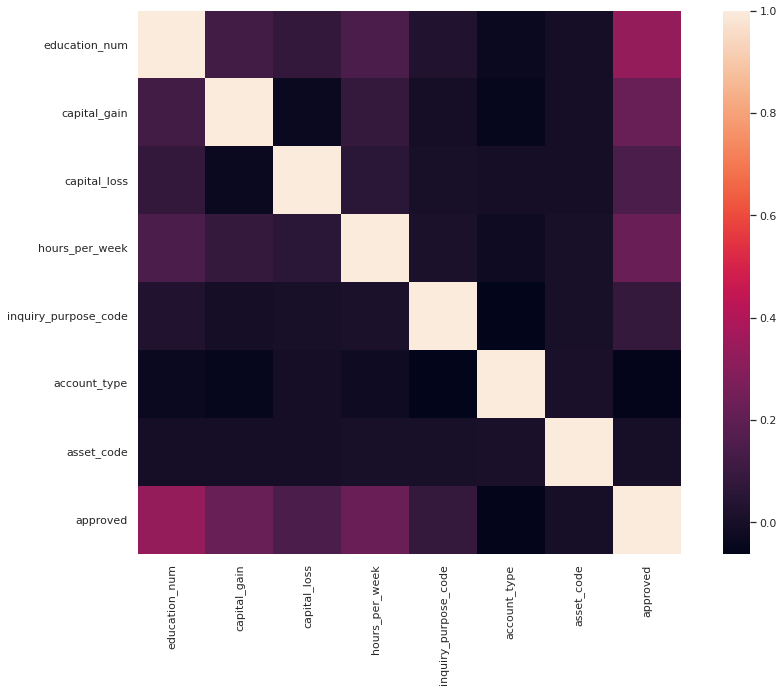

In [18]:
correlation = data.corr()
fig = plt.figure(figsize = (15, 10))
sns.heatmap(correlation, vmax = 1, square = True)
plt.show()

**Checking the frequency of rejections and approvals of cards**

In [19]:
data.approved.value_counts()

0    34014
1    11208
Name: approved, dtype: int64

**Dividing the data according to credit cards are approved or rejected**

In [20]:
rejected=data.loc[data['approved']==0]
Approved=data.loc[data['approved']==1]

**Printing the rejected cards**

In [21]:
rejected

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,approved
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,"45424 Norris Common Apt. 390\r\nNorth Mike, AR...",vasquezleah@yahoo.com,7.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,"5022 Rebecca Haven Apt. 258\r\nThompsonfurt, C...",johnsontrevor@hotmail.com,13.00000,NBF,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,"8780 Brown Loaf Apt. 099\r\nNorth David, NJ 56510",morganemily@gmail.com,13.00000,NBF,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,721 Jackson Extensions Suite 995\r\nNew Tarasi...,agarcia@hotmail.com,13.00000,NBF,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,"935 Burch Divide\r\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.00000,PVT,47,S,1.0,I,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34009,9566bdcc-34aa-48f7-8783-5d4d994cf5cd,Female,2000-12-30,Private,HS-grad,9.0,Never-married,Other-service,Own-child,34095.0,0.0,20.0,"259 Kyle Course Apt. 209\r\nNew Toddmouth, MA ...",josephhood@yahoo.com,16.00000,NBF,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
34010,c46471f2-f28e-48b0-8557-937838beaf0e,Male,1965-01-08,Self-emp-not-inc,HS-grad,9.0,Divorced,Exec-managerial,Not-in-family,34095.0,0.0,60.0,"10754 Stephanie Drive\r\nSouth Johnmouth, AR 9...",erika74@gmail.com,28.93656,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0
34011,a8b04584-54ec-4d52-af0c-630b435fc3c9,Male,1984-01-04,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,41310.0,0.0,90.0,"295 Greer Grove\r\nKariborough, MT 89651",khawkins@white-moore.org,13.00000,NBF,189,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,I,0
34012,f2ecd5ab-8b3e-4d87-94a0-2943bccd3fa5,Male,1993-01-01,Private,Preschool,1.0,Married-civ-spouse,Farming-fishing,Other-relative,41310.0,0.0,24.0,"PSC 0200, Box 2001\r\nAPO AA 31658",probinson@gmail.com,13.00000,NBF,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,0


**Printing the Approved cards**

In [22]:
Approved

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,approved
34014,3b87da86-5bf6-4da1-9d93-242c59a16c64,Male,1961-01-09,Private,Doctorate,16.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,40.0,"6333 Melissa Orchard\r\nAlejandramouth, AZ 17140",carrkelly@yahoo.com,28.93656,NBF,189,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,I,1
34015,cca3860f-fc77-4543-b55d-0e15511198a0,Male,1967-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,40.0,43114 Cabrera Junctions Suite 186\r\nNorth Jes...,harristiffany@yahoo.com,99.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,1
34016,bc08501f-eade-43d9-9c3b-9cd74457ea7d,Male,1969-01-07,Private,HS-grad,9.0,Married-civ-spouse,Protective-serv,Husband,0.0,0.0,40.0,"25352 Garcia Ridge\r\nJessicaside, LA 77106",jameshenry@king.info,13.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,1
34017,1aabd327-09c5-406f-ba23-7c0162fcf2b1,Male,1979-01-05,Private,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,0.0,0.0,40.0,"130 Terrell Landing\r\nAnnemouth, VT 56232",ryan21@whitaker.net,14.00000,HFC,58,d6ada12b-4bd0-4050-9b25-de24c7868ba1,2.0,M,1
34018,422898cc-0745-4305-8e2e-74829a29167f,Male,1958-01-10,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,50.0,"914 Sherry Coves Suite 283\r\nWest Tammystad, ...",mooremiranda@king.info,7.00000,PVT,189,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,I,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,6f5de269-e3b6-4aa0-84a5-e2ab5d3e455c,Male,1976-01-06,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,60.0,"38911 Heather Ranch\r\nEast Carolyn, ND 59814",jack72@richards.com,7.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,1
45218,e8e5fd1d-ef19-4652-b6e7-5ba18449e80e,Male,1977-01-05,Private,Prof-school,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,99999.0,0.0,40.0,20346 Fitzpatrick Prairie Suite 117\r\nWeaverh...,jason17@johnson-williams.org,7.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,1
45219,1b3ed3e9-0283-4ba4-a7c7-f608f03f296e,Male,1964-01-09,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,45.0,"653 Valerie Cliffs Suite 914\r\nPort Hannah, D...",qdaniels@hotmail.com,13.00000,NBF,189,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,I,1
45220,642859b2-f587-48ef-a5b1-89710301fc71,Male,1979-01-05,Private,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,99999.0,0.0,40.0,"6957 Daniel Avenue\r\nWest Jason, VA 80167",whitakersteven@yahoo.com,7.00000,PVT,5,d6ada12b-4bd0-4050-9b25-de24c7868ba1,1.0,R,1


**Length of Approved cards**

In [23]:
len(Approved)

11208

**Length of rejected cards**

In [24]:
len(rejected)

34014

**Plotting the category plot**

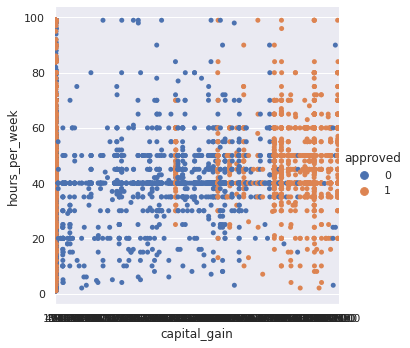

In [25]:
sns.catplot(x='capital_gain',y='hours_per_week',hue='approved',data=data)

**Conversion of non numeric data to numeric**

In [26]:
labelencoder = LabelEncoder()

# looping over every column in dataset
for column in data.columns:
# checking the datatype of column is object or no  
    if data[column].dtypes == 'object':
# Transformation to the numeric value using label encoder 
      data[column] = labelencoder.fit_transform(data[column])

NOW ALL THE FIELDS ARE IN NUMERIC DATATYPE....

**Converting dataframe to array and then Separating Independent and dependent variables**

In [27]:
dt=data.values
X= dt[:,0:-1]
Y= dt[:,20]

**Splitting the dataset into training and testing datasets**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

**Checking the size of training and testing datasets**

In [29]:
training_size = len(X_train)
test_size = len(X_test)
print('Size of training and testing : ',training_size,test_size)

Size of training and testing :  31655 13567


**Apply MinMax Scaler to transform the values between 0 and 1**

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
r_train = scaler.fit_transform(X_train)   #rescaling training dataset
r_test = scaler.fit_transform(X_test)     #rescaling testing dataset

**Logistic Regression as a model**

In [39]:
model = LogisticRegression()
model.fit(r_train, Y_train)
prediction = model.predict(r_test)
print('Accuracy:',metrics.accuracy_score(prediction,Y_test))

Accuracy: 0.823321294317093


**Confusion Matrix as a model**

In [32]:
confusion_mat = confusion_matrix(Y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(Y_test,prediction))

Confusion matrix: 
 [[9515  739]
 [1658 1655]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89     10254
         1.0       0.69      0.50      0.58      3313

    accuracy                           0.82     13567
   macro avg       0.77      0.71      0.73     13567
weighted avg       0.81      0.82      0.81     13567



**Support Vector as Model**

In [34]:
model1 = SVC()
model1.fit(r_train,Y_train)
Y_pred = model1.predict(r_test)
print("Accuracy=",accuracy_score(Y_test,Y_pred))

Accuracy= 0.8447703987617012


**KNN as a Model**

In [35]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(r_train,Y_train)
Y_pred2 = model2.predict(r_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred2))

Accuracy Score: 0.799882066779686


**Decision Tree as a Model**

In [37]:
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(r_train,Y_train)
Y_pred3 = model3.predict(r_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred3))

Accuracy Score: 0.7945013636028598


Accuracy to predict if credit card is approved or rejected in
logistic regression has accuracy is 82%.
Support vector has accuracy of 85%.
K nearest Neighbor has accuracy of 80%.
Decision Tree has accuracy of 80%.